In [1]:
import numpy as np
import pandas as pd 
import os
from keras.models import Sequential, load_model
from keras.layers import (Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D,
                          BatchNormalization, Input, Conv2D, GlobalAveragePooling2D,concatenate,Concatenate,multiply, LocallyConnected2D, Lambda)
from keras.callbacks import ModelCheckpoint
from keras import metrics
from keras import backend as K
import keras
from keras.models import Model
import matplotlib.pyplot as plt
from tensorflow.keras.applications import EfficientNetB7
import skimage.io
from skimage.transform import resize

from tqdm import tqdm
import PIL
from PIL import Image, ImageOps
import cv2
from sklearn.utils import class_weight, shuffle
from keras.losses import binary_crossentropy, categorical_crossentropy
#from keras.applications.resnet50 import preprocess_input
from keras.applications.densenet import DenseNet121,DenseNet169,preprocess_input
import keras.backend as K
import tensorflow as tf
from sklearn.metrics import f1_score, fbeta_score, cohen_kappa_score

import keras.callbacks as callbacks
from keras.callbacks import Callback
get_ipython().run_line_magic('config', 'InlineBackend.figure_format="svg"')
get_ipython().run_line_magic('matplotlib', 'inline')

import warnings
warnings.filterwarnings("ignore")
SIZE = 224
NUM_CLASSES = 2
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model, load_model
from keras.layers import Embedding, LSTM, Dropout, Dense, Input, Bidirectional, Flatten, Conv2D, MaxPooling2D, concatenate, Conv1D, MaxPooling1D
import keras.backend as K
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate
from keras.models import Model



In [2]:
from sklearn.model_selection import train_test_split


In [4]:
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler


def get_num_input():
    df = pd.read_csv('/DATA/akanksha_2021cs39/Ad.csv')
    df = df.drop(['filename'],axis=1)
    columns = list(df.columns)
    features = columns[:-1]
    cls_name = columns[-1]
    X = np.zeros((len(df), len(features)))
    Y = list()
    for i, row in df.iterrows():
        X[i] = row[features]                    
        Y.append(row[cls_name])

    return (X, Y)
X_num, Y = get_num_input()
encoder = LabelEncoder()
Y = encoder.fit_transform(Y)
X_audio_train, X_audio_test, y_audio_train, y_audio_test = train_test_split( X_num, Y, test_size=0.2,random_state=42)

In [5]:
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate
from keras.models import Model
import numpy as np
from keras import regularizers
from keras.layers import Dropout 
def compile_model():
    num_input = Input(shape=(133,))        ## branch 2 with numerical input
    x1 = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(num_input)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dropout(0.3)(x1)
    x1 = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    x1 = Dropout(0.3)(x1)
    out_b = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x1)
    out_b = Dense(1, activation='sigmoid')(out_b)
    model = Model(num_input, out_b)
    adam = Adam(lr=0.001, decay=1e-5)
    print(model.summary())
    model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
    return model

In [6]:
model = compile_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 133)]             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              137216    
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0     

In [7]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
history=model.fit(X_audio_train, y_audio_train, batch_size=256, epochs=1000,
                            validation_data=(X_audio_test, y_audio_test), callbacks=[es])

Epoch 1/1000
67/67 [==============================] - 3s 22ms/step - loss: 14.1072 - accuracy: 0.8862 - val_loss: 8.8871 - val_accuracy: 0.9475
Epoch 2/1000
67/67 [==============================] - 1s 17ms/step - loss: 8.4064 - accuracy: 0.9138 - val_loss: 7.8010 - val_accuracy: 0.9475
Epoch 3/1000
67/67 [==============================] - 1s 17ms/step - loss: 7.2356 - accuracy: 0.9329 - val_loss: 6.7592 - val_accuracy: 0.9475
Epoch 4/1000
67/67 [==============================] - 1s 13ms/step - loss: 6.3677 - accuracy: 0.9415 - val_loss: 6.0430 - val_accuracy: 0.9475
Epoch 5/1000
67/67 [==============================] - 1s 13ms/step - loss: 5.6430 - accuracy: 0.9442 - val_loss: 5.4575 - val_accuracy: 0.9475
Epoch 6/1000
67/67 [==============================] - 1s 13ms/step - loss: 5.0194 - accuracy: 0.9454 - val_loss: 4.7684 - val_accuracy: 0.9475
Epoch 7/1000
67/67 [==============================] - 1s 13ms/step - loss: 4.4765 - accuracy: 0.9457 - val_loss: 4.2842 - val_accuracy: 0.947

Epoch 58/1000
67/67 [==============================] - 1s 14ms/step - loss: 0.2388 - accuracy: 0.9459 - val_loss: 0.2282 - val_accuracy: 0.9475
Epoch 59/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2356 - accuracy: 0.9459 - val_loss: 0.2264 - val_accuracy: 0.9475
Epoch 60/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2349 - accuracy: 0.9459 - val_loss: 0.2250 - val_accuracy: 0.9475
Epoch 61/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2315 - accuracy: 0.9459 - val_loss: 0.2226 - val_accuracy: 0.9475
Epoch 62/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2303 - accuracy: 0.9459 - val_loss: 0.2213 - val_accuracy: 0.9475
Epoch 63/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2297 - accuracy: 0.9459 - val_loss: 0.2206 - val_accuracy: 0.9475
Epoch 64/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2276 - accuracy: 0.9459 - val_loss: 0.2172 - val_accuracy:

Epoch 115/1000
67/67 [==============================] - 1s 17ms/step - loss: 0.2080 - accuracy: 0.9459 - val_loss: 0.2011 - val_accuracy: 0.9475
Epoch 116/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2084 - accuracy: 0.9459 - val_loss: 0.2014 - val_accuracy: 0.9475
Epoch 117/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2079 - accuracy: 0.9459 - val_loss: 0.2043 - val_accuracy: 0.9475
Epoch 118/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2092 - accuracy: 0.9459 - val_loss: 0.2019 - val_accuracy: 0.9475
Epoch 119/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2085 - accuracy: 0.9459 - val_loss: 0.2032 - val_accuracy: 0.9475
Epoch 120/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2073 - accuracy: 0.9459 - val_loss: 0.2016 - val_accuracy: 0.9475
Epoch 121/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2087 - accuracy: 0.9459 - val_loss: 0.2017 - val_ac

67/67 [==============================] - 1s 16ms/step - loss: 0.2051 - accuracy: 0.9459 - val_loss: 0.1983 - val_accuracy: 0.9475
Epoch 228/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2036 - accuracy: 0.9459 - val_loss: 0.2001 - val_accuracy: 0.9475
Epoch 229/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2040 - accuracy: 0.9459 - val_loss: 0.1978 - val_accuracy: 0.9475
Epoch 230/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2048 - accuracy: 0.9459 - val_loss: 0.1988 - val_accuracy: 0.9475
Epoch 231/1000
67/67 [==============================] - 1s 13ms/step - loss: 0.2050 - accuracy: 0.9459 - val_loss: 0.1985 - val_accuracy: 0.9475
Epoch 232/1000
67/67 [==============================] - 1s 13ms/step - loss: 0.2055 - accuracy: 0.9459 - val_loss: 0.1979 - val_accuracy: 0.9475
Epoch 233/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2046 - accuracy: 0.9459 - val_loss: 0.1986 - val_accuracy: 0.9475


67/67 [==============================] - 1s 15ms/step - loss: 0.2032 - accuracy: 0.9459 - val_loss: 0.1969 - val_accuracy: 0.9475
Epoch 340/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2034 - accuracy: 0.9459 - val_loss: 0.2015 - val_accuracy: 0.9475
Epoch 341/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2044 - accuracy: 0.9459 - val_loss: 0.2018 - val_accuracy: 0.9475
Epoch 342/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2052 - accuracy: 0.9459 - val_loss: 0.1988 - val_accuracy: 0.9475
Epoch 343/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2045 - accuracy: 0.9459 - val_loss: 0.2006 - val_accuracy: 0.9475
Epoch 344/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2036 - accuracy: 0.9459 - val_loss: 0.1971 - val_accuracy: 0.9475
Epoch 345/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2020 - accuracy: 0.9459 - val_loss: 0.1970 - val_accuracy: 0.9475


67/67 [==============================] - 1s 15ms/step - loss: 0.2018 - accuracy: 0.9459 - val_loss: 0.1990 - val_accuracy: 0.9475
Epoch 452/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2017 - accuracy: 0.9459 - val_loss: 0.1965 - val_accuracy: 0.9475
Epoch 453/1000
67/67 [==============================] - 1s 13ms/step - loss: 0.2042 - accuracy: 0.9459 - val_loss: 0.1960 - val_accuracy: 0.9475
Epoch 454/1000
67/67 [==============================] - 1s 14ms/step - loss: 0.2023 - accuracy: 0.9459 - val_loss: 0.1967 - val_accuracy: 0.9475
Epoch 455/1000
67/67 [==============================] - 1s 14ms/step - loss: 0.2018 - accuracy: 0.9459 - val_loss: 0.1960 - val_accuracy: 0.9475
Epoch 456/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2013 - accuracy: 0.9459 - val_loss: 0.1955 - val_accuracy: 0.9475
Epoch 457/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2017 - accuracy: 0.9459 - val_loss: 0.1971 - val_accuracy: 0.9475


67/67 [==============================] - 1s 15ms/step - loss: 0.2029 - accuracy: 0.9459 - val_loss: 0.1952 - val_accuracy: 0.9475
Epoch 564/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2009 - accuracy: 0.9459 - val_loss: 0.1961 - val_accuracy: 0.9475
Epoch 565/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2021 - accuracy: 0.9459 - val_loss: 0.1975 - val_accuracy: 0.9475
Epoch 566/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2015 - accuracy: 0.9459 - val_loss: 0.1952 - val_accuracy: 0.9475
Epoch 567/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2019 - accuracy: 0.9459 - val_loss: 0.1954 - val_accuracy: 0.9475
Epoch 568/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2007 - accuracy: 0.9459 - val_loss: 0.1982 - val_accuracy: 0.9475
Epoch 569/1000
67/67 [==============================] - 1s 13ms/step - loss: 0.2014 - accuracy: 0.9459 - val_loss: 0.1955 - val_accuracy: 0.9475


67/67 [==============================] - 1s 14ms/step - loss: 0.2019 - accuracy: 0.9459 - val_loss: 0.2038 - val_accuracy: 0.9475
Epoch 676/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2026 - accuracy: 0.9459 - val_loss: 0.1958 - val_accuracy: 0.9475
Epoch 677/1000
67/67 [==============================] - 1s 14ms/step - loss: 0.2006 - accuracy: 0.9459 - val_loss: 0.1941 - val_accuracy: 0.9475
Epoch 678/1000
67/67 [==============================] - 1s 13ms/step - loss: 0.2009 - accuracy: 0.9459 - val_loss: 0.1947 - val_accuracy: 0.9475
Epoch 679/1000
67/67 [==============================] - 1s 13ms/step - loss: 0.2005 - accuracy: 0.9459 - val_loss: 0.2071 - val_accuracy: 0.9475
Epoch 680/1000
67/67 [==============================] - 1s 14ms/step - loss: 0.2027 - accuracy: 0.9459 - val_loss: 0.1961 - val_accuracy: 0.9475
Epoch 681/1000
67/67 [==============================] - 1s 14ms/step - loss: 0.2008 - accuracy: 0.9459 - val_loss: 0.1990 - val_accuracy: 0.9475


67/67 [==============================] - 1s 15ms/step - loss: 0.2003 - accuracy: 0.9459 - val_loss: 0.1938 - val_accuracy: 0.9475
Epoch 788/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2014 - accuracy: 0.9459 - val_loss: 0.1940 - val_accuracy: 0.9475
Epoch 789/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.1999 - accuracy: 0.9459 - val_loss: 0.1934 - val_accuracy: 0.9475
Epoch 790/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2011 - accuracy: 0.9459 - val_loss: 0.1933 - val_accuracy: 0.9475
Epoch 791/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2012 - accuracy: 0.9459 - val_loss: 0.1934 - val_accuracy: 0.9475
Epoch 792/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2015 - accuracy: 0.9459 - val_loss: 0.1948 - val_accuracy: 0.9475
Epoch 793/1000
67/67 [==============================] - 1s 14ms/step - loss: 0.2004 - accuracy: 0.9459 - val_loss: 0.1992 - val_accuracy: 0.9475


67/67 [==============================] - 1s 16ms/step - loss: 0.2006 - accuracy: 0.9459 - val_loss: 0.1935 - val_accuracy: 0.9475
Epoch 900/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2021 - accuracy: 0.9459 - val_loss: 0.1941 - val_accuracy: 0.9475
Epoch 901/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.1992 - accuracy: 0.9459 - val_loss: 0.1944 - val_accuracy: 0.9475
Epoch 902/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2001 - accuracy: 0.9459 - val_loss: 0.1951 - val_accuracy: 0.9475
Epoch 903/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.2016 - accuracy: 0.9459 - val_loss: 0.1943 - val_accuracy: 0.9475
Epoch 904/1000
67/67 [==============================] - 1s 15ms/step - loss: 0.2015 - accuracy: 0.9459 - val_loss: 0.1975 - val_accuracy: 0.9475
Epoch 905/1000
67/67 [==============================] - 1s 16ms/step - loss: 0.1994 - accuracy: 0.9459 - val_loss: 0.1936 - val_accuracy: 0.9475


In [8]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="lower right")
    plt.show()

In [9]:
def plot_loss(hist):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

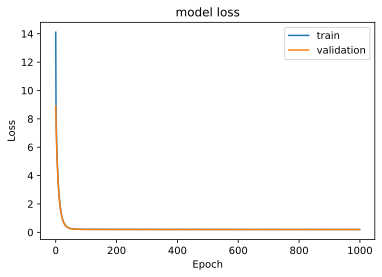

In [10]:
plot_loss(history)

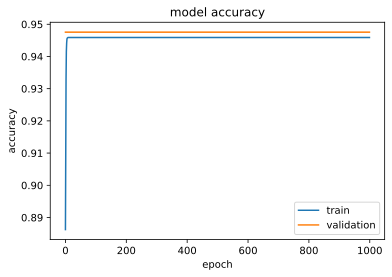

In [11]:
plot_hist(history)

In [12]:
# evaluate the model
train_loss, train_acc = model.evaluate(X_audio_train, y_audio_train, verbose=0)
test_loss, test_acc = model.evaluate(X_audio_test, y_audio_test, verbose=0)
print('Train_Loss: %.3f, Train_Acc: %.3f' % (train_loss, train_acc))
print('Test_Loss: %.3f, Test_Acc: %.3f' % (test_loss, test_acc))

Train_Loss: 0.194, Train_Acc: 0.946
Test_Loss: 0.194, Test_Acc: 0.948


In [13]:
pred = model.predict(X_audio_test)

In [14]:
y_pred = (model.predict(X_audio_test) > 0.5)*1

In [15]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
score = accuracy_score(y_audio_test, y_pred)
precision = precision_score(y_audio_test,y_pred)
recall = recall_score(y_audio_test,y_pred)
f1 = f1_score(y_audio_test,y_pred)
print("score:", score)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1)

score: 0.9475417548812044
Precision: 0.0
Recall: 0.0
F1_score: 0.0


In [16]:
# confusion matrix
matrix = confusion_matrix(y_audio_test, y_pred, labels=[0,1])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[4028    0]
 [ 223    0]]


In [17]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_audio_test, y_pred, labels=[0,1])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      4028
           1       0.00      0.00      0.00       223

    accuracy                           0.95      4251
   macro avg       0.47      0.50      0.49      4251
weighted avg       0.90      0.95      0.92      4251



In [18]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_audio_test, y_pred,labels=[0,1]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 4028 0 223 0


In [3]:
from PIL import Image
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

def get_img_input():
    df = pd.read_csv('/DATA/akanksha_2021cs39/Vd.csv')
    columns = list(df.columns)
    features = columns[:-1]
    cls_name = columns[-1]
    X = np.zeros((len(df), len(features)))
    Y = list()
    for i, row in df.iterrows():
        X[i] = row[features]                    
        Y.append(row[cls_name])

    return (X, Y)
X_img, Y_img = get_img_input()
encoder = LabelEncoder()
Y_img = encoder.fit_transform(Y_img)
X_img_train, X_img_test, y_img_train, y_img_test = train_test_split( X_img, Y_img, test_size=0.3,random_state=42)

In [4]:
from keras.layers import Conv2D, MaxPooling2D, Input, Dense, Flatten, concatenate
from keras.models import Model
import numpy as np
from keras import regularizers
from keras.layers import Dropout 
def compile_model():
    img_input = Input(shape=(50176,)) 
    ## branch 1 with image input
    x = Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01))(img_input)
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    x = Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    x = Dropout(0.3)(x)
    out_a = Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
    out_a = Dense(1, activation='sigmoid')(out_a)
    model = Model(img_input, out_a)
    adam = Adam(lr=0.001, decay=1e-5)
    print(model.summary())
    model.compile(loss="binary_crossentropy", optimizer=adam, metrics=["accuracy"])
    return model
    #x = MaxPooling2D((2, 2))(x)
    #x = Flatten()(x)
    #out_a = Dense(64)(x)

    

In [5]:
model = compile_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50176)]           0         
_________________________________________________________________
dense (Dense)                (None, 1024)              51381248  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0     

In [6]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
history=model.fit(X_img_train, y_img_train, batch_size=256, epochs=1000,
                            validation_data=(X_img_test, y_img_test), callbacks=[es])

Epoch 1/1000
59/59 [==============================] - 25s 384ms/step - loss: 248.4013 - accuracy: 0.9095 - val_loss: 54.5382 - val_accuracy: 0.9694
Epoch 2/1000
59/59 [==============================] - 22s 368ms/step - loss: 74.5395 - accuracy: 0.9322 - val_loss: 35.0085 - val_accuracy: 0.9694
Epoch 3/1000
59/59 [==============================] - 21s 349ms/step - loss: 45.8410 - accuracy: 0.9238 - val_loss: 31.8831 - val_accuracy: 0.9694
Epoch 4/1000
59/59 [==============================] - 21s 352ms/step - loss: 36.1616 - accuracy: 0.9309 - val_loss: 28.4527 - val_accuracy: 0.9694
Epoch 5/1000
59/59 [==============================] - 21s 349ms/step - loss: 30.4684 - accuracy: 0.9314 - val_loss: 26.1046 - val_accuracy: 0.9694
Epoch 6/1000
59/59 [==============================] - 21s 360ms/step - loss: 25.6694 - accuracy: 0.9395 - val_loss: 23.5909 - val_accuracy: 0.9694
Epoch 7/1000
59/59 [==============================] - 21s 352ms/step - loss: 23.2046 - accuracy: 0.9529 - val_loss: 2

Epoch 57/1000
59/59 [==============================] - 20s 346ms/step - loss: 4.7372 - accuracy: 0.9686 - val_loss: 4.7055 - val_accuracy: 0.9694
Epoch 58/1000
59/59 [==============================] - 21s 353ms/step - loss: 4.6997 - accuracy: 0.9685 - val_loss: 4.6262 - val_accuracy: 0.9694
Epoch 59/1000
59/59 [==============================] - 21s 349ms/step - loss: 4.6173 - accuracy: 0.9687 - val_loss: 4.5669 - val_accuracy: 0.9694
Epoch 60/1000
59/59 [==============================] - 21s 349ms/step - loss: 4.5347 - accuracy: 0.9686 - val_loss: 4.4973 - val_accuracy: 0.9694
Epoch 61/1000
59/59 [==============================] - 21s 358ms/step - loss: 4.4818 - accuracy: 0.9686 - val_loss: 4.4503 - val_accuracy: 0.9694
Epoch 62/1000
59/59 [==============================] - 20s 340ms/step - loss: 4.4026 - accuracy: 0.9687 - val_loss: 4.3664 - val_accuracy: 0.9694
Epoch 63/1000
59/59 [==============================] - 20s 344ms/step - loss: 4.3701 - accuracy: 0.9683 - val_loss: 4.3559 -

59/59 [==============================] - 20s 347ms/step - loss: 1.5631 - accuracy: 0.9689 - val_loss: 1.5431 - val_accuracy: 0.9694
Epoch 114/1000
59/59 [==============================] - 20s 341ms/step - loss: 1.5324 - accuracy: 0.9687 - val_loss: 1.5064 - val_accuracy: 0.9694
Epoch 115/1000
59/59 [==============================] - 20s 336ms/step - loss: 1.5042 - accuracy: 0.9687 - val_loss: 1.4803 - val_accuracy: 0.9694
Epoch 116/1000
59/59 [==============================] - 20s 341ms/step - loss: 1.4636 - accuracy: 0.9685 - val_loss: 1.4244 - val_accuracy: 0.9694
Epoch 117/1000
59/59 [==============================] - 21s 351ms/step - loss: 1.4131 - accuracy: 0.9687 - val_loss: 1.3902 - val_accuracy: 0.9694
Epoch 118/1000
59/59 [==============================] - 21s 349ms/step - loss: 1.3863 - accuracy: 0.9685 - val_loss: 1.3543 - val_accuracy: 0.9694
Epoch 119/1000
59/59 [==============================] - 20s 344ms/step - loss: 1.3595 - accuracy: 0.9684 - val_loss: 1.3120 - val_acc

Epoch 169/1000
59/59 [==============================] - 20s 341ms/step - loss: 0.2514 - accuracy: 0.9689 - val_loss: 0.2458 - val_accuracy: 0.9694
Epoch 170/1000
59/59 [==============================] - 20s 337ms/step - loss: 0.2443 - accuracy: 0.9689 - val_loss: 0.2391 - val_accuracy: 0.9694
Epoch 171/1000
59/59 [==============================] - 20s 339ms/step - loss: 0.2379 - accuracy: 0.9689 - val_loss: 0.2328 - val_accuracy: 0.9694
Epoch 172/1000
59/59 [==============================] - 20s 336ms/step - loss: 0.2318 - accuracy: 0.9689 - val_loss: 0.2269 - val_accuracy: 0.9694
Epoch 173/1000
59/59 [==============================] - 20s 340ms/step - loss: 0.2261 - accuracy: 0.9689 - val_loss: 0.2213 - val_accuracy: 0.9694
Epoch 174/1000
59/59 [==============================] - 20s 347ms/step - loss: 0.2207 - accuracy: 0.9689 - val_loss: 0.2161 - val_accuracy: 0.9694
Epoch 175/1000
59/59 [==============================] - 20s 343ms/step - loss: 0.2155 - accuracy: 0.9689 - val_loss: 0

Epoch 225/1000
59/59 [==============================] - 20s 337ms/step - loss: 0.1400 - accuracy: 0.9689 - val_loss: 0.1381 - val_accuracy: 0.9694
Epoch 226/1000
59/59 [==============================] - 20s 338ms/step - loss: 0.1399 - accuracy: 0.9689 - val_loss: 0.1379 - val_accuracy: 0.9694
Epoch 227/1000
59/59 [==============================] - 20s 334ms/step - loss: 0.1398 - accuracy: 0.9689 - val_loss: 0.1378 - val_accuracy: 0.9694
Epoch 228/1000
59/59 [==============================] - 20s 339ms/step - loss: 0.1396 - accuracy: 0.9689 - val_loss: 0.1377 - val_accuracy: 0.9694
Epoch 229/1000
59/59 [==============================] - 20s 337ms/step - loss: 0.1395 - accuracy: 0.9689 - val_loss: 0.1376 - val_accuracy: 0.9694
Epoch 230/1000
59/59 [==============================] - 20s 339ms/step - loss: 0.1395 - accuracy: 0.9689 - val_loss: 0.1375 - val_accuracy: 0.9694
Epoch 231/1000
59/59 [==============================] - 20s 345ms/step - loss: 0.1394 - accuracy: 0.9689 - val_loss: 0

Epoch 281/1000
59/59 [==============================] - 20s 337ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0.1368 - val_accuracy: 0.9694
Epoch 282/1000
59/59 [==============================] - 19s 331ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0.1368 - val_accuracy: 0.9694
Epoch 283/1000
59/59 [==============================] - 20s 336ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0.1368 - val_accuracy: 0.9694
Epoch 284/1000
59/59 [==============================] - 20s 333ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0.1368 - val_accuracy: 0.9694
Epoch 285/1000
59/59 [==============================] - 20s 342ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0.1368 - val_accuracy: 0.9694
Epoch 286/1000
59/59 [==============================] - 20s 340ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0.1368 - val_accuracy: 0.9694
Epoch 287/1000
59/59 [==============================] - 20s 334ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0

Epoch 337/1000
59/59 [==============================] - 20s 334ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0.1368 - val_accuracy: 0.9694
Epoch 338/1000
59/59 [==============================] - 20s 334ms/step - loss: 0.1388 - accuracy: 0.9689 - val_loss: 0.1369 - val_accuracy: 0.9694
Epoch 339/1000
59/59 [==============================] - 20s 335ms/step - loss: 0.1389 - accuracy: 0.9689 - val_loss: 0.1369 - val_accuracy: 0.9694
Epoch 340/1000
59/59 [==============================] - 20s 333ms/step - loss: 0.1388 - accuracy: 0.9689 - val_loss: 0.1369 - val_accuracy: 0.9694
Epoch 341/1000
59/59 [==============================] - 19s 329ms/step - loss: 0.1388 - accuracy: 0.9689 - val_loss: 0.1368 - val_accuracy: 0.9694
Epoch 342/1000
59/59 [==============================] - 19s 328ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0.1368 - val_accuracy: 0.9694
Epoch 343/1000
59/59 [==============================] - 19s 328ms/step - loss: 0.1387 - accuracy: 0.9689 - val_loss: 0

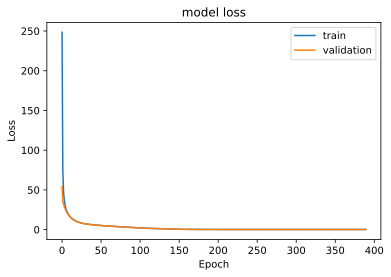

In [10]:
plot_loss(history)

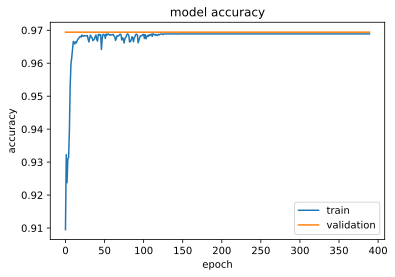

In [11]:
plot_hist(history)

In [12]:
# evaluate the model
train_loss, train_acc = model.evaluate(X_img_train, y_img_train, verbose=0)
test_loss, test_acc = model.evaluate(X_img_test, y_img_test, verbose=0)
print('Train_Loss: %.3f, Train_Acc: %.3f' % (train_loss, train_acc))
print('Test_Loss: %.3f, Test_Acc: %.3f' % (test_loss, test_acc))

Train_Loss: 0.139, Train_Acc: 0.969
Test_Loss: 0.137, Test_Acc: 0.969


In [13]:
pred = model.predict(X_img_test)

In [14]:
y_pred = (model.predict(X_img_test) > 0.5)*1

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
score = accuracy_score(y_img_test, y_pred)
precision = precision_score(y_img_test,y_pred)
recall = recall_score(y_img_test,y_pred)
f1 = f1_score(y_img_test,y_pred)
print("score:", score)
print("Precision:", precision)
print("Recall:", recall)
print("F1_score:", f1)

score: 0.9694165621079046
Precision: 0.0
Recall: 0.0
F1_score: 0.0


In [17]:
# confusion matrix
matrix = confusion_matrix(y_img_test, y_pred, labels=[0,1])
print('Confusion matrix : \n',matrix)

Confusion matrix : 
 [[6181    0]
 [ 195    0]]


In [18]:
# classification report for precision, recall f1-score and accuracy
matrix = classification_report(y_img_test, y_pred, labels=[0,1])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      6181
           1       0.00      0.00      0.00       195

    accuracy                           0.97      6376
   macro avg       0.48      0.50      0.49      6376
weighted avg       0.94      0.97      0.95      6376



In [19]:
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(y_img_test, y_pred,labels=[0,1]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

Outcome values : 
 6181 0 195 0
